# 중국 도시 인구 소득 및 지출 분석

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
# 수업 시작전 설정
%matplotlib inline
%config InlineBackend.figure_format='retina'
#한글 설정
plt.rc("font", family="Malgun Gothic")
plt.rc("axes", unicode_minus=False) # y축
# 경고 메세지 안 보이게 
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

## 데이터 불러오기

In [2]:
china_expense_income=pd.read_excel('data/중국 도시에 있는 사람들 소득과 지출평균.xls',header=2)

## 데이터 확인


In [3]:
china_expense_income.info()
china_expense_income.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16 entries, 0 to 15
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   指标      16 non-null     object 
 1   2020年   2 non-null      float64
 2   2019年   14 non-null     float64
 3   2018年   14 non-null     float64
 4   2017年   14 non-null     float64
 5   2016年   14 non-null     float64
dtypes: float64(5), object(1)
memory usage: 896.0+ bytes


,2020年,2019年,2018年,2017年,2016年
count,2.000000,14.000000,14.000000,14.000000,14.000000
mean,35420.500000,10060.285714,9337.500000,8691.714286,8099.357143
std,11898.485807,12590.164662,11687.285792,10875.795790,10107.688442
min,27007.000000,747.000000,687.000000,652.000000,595.000000
25%,31213.750000,2544.250000,2278.000000,2044.500000,1963.750000
50%,35420.500000,4615.500000,4235.500000,3836.000000,3520.500000
75%,39627.250000,7690.500000,7176.250000,6881.750000,6549.000000
max,43834.000000,42359.000000,39251.000000,36396.000000,33616.000000


## 데이터 컬럼,인덱스 변경 및 결측치 0

In [4]:
china_expense_income=china_expense_income.T.rename(columns=china_expense_income.T.iloc[0])
china_expense_income.drop(china_expense_income.index[0],inplace=True)
china_expense_income.drop(china_expense_income.columns[-1:-3:-1],axis='columns',inplace=True)
china_expense_income=china_expense_income.fillna(0)

## 위안화 -> 원화로 변경

In [5]:
# 3월 31일 환율기준! 변환변환
china_expense_income=china_expense_income.multiply(172.17)
china_expense_income=china_expense_income.round(-3)

## 컬럼명 한국어로 변경 및 인덱스 변경

In [6]:
china_expese=china_expense_income.loc[:,'城镇居民人均消费支出(元)':'城镇居民人均其他用品及服务消费支出(元)']
china_expese.columns=['총 소비 지출','식품과 술','의류비','주거비','생활용품 및 서비스 지출','교통 및 통신지출','문화,교육,여가 지출','의료보건','그외 기타지출']
china_expese.reset_index(inplace=True)
china_expese.rename(columns={'index':'年'},inplace=True)
expense=china_expese.drop(china_expese.index[0]).drop(columns='총 소비 지출')
expense.loc[:,'식품과 술':'그외 기타지출']=expense.loc[:,'식품과 술':'그외 기타지출'].apply(pd.to_numeric).multiply(0.0001)

## 년도별 데이터 정렬

In [7]:
expense.sort_values(by=['年'],inplace=True)

##  line plot 시각화

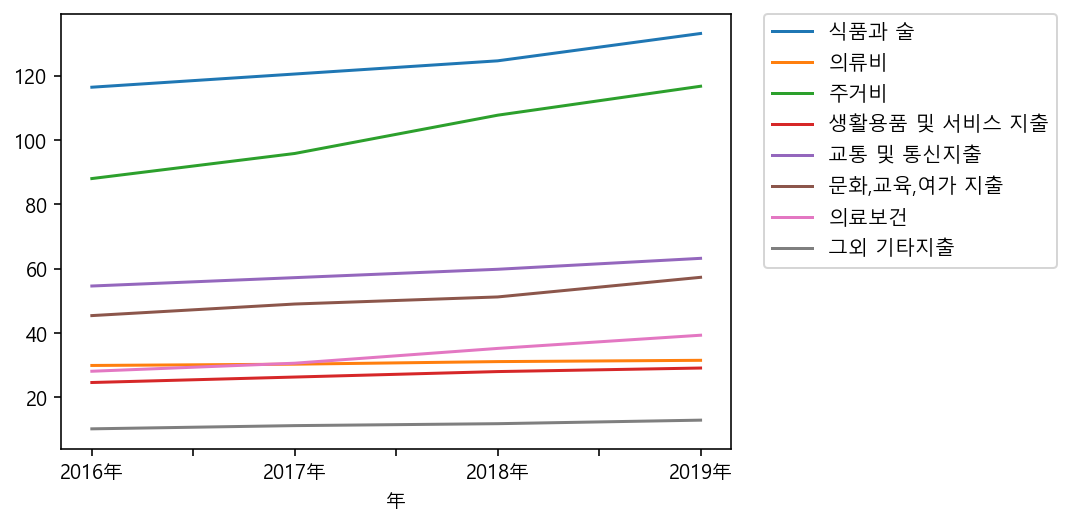

In [8]:
expense.plot(x='年')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

## 2019년 지출 pie 시각화를 위해 2019년 데이터 추출

In [9]:
expense_2019=expense.loc[expense['年']=='2019年']
#expense.sort_values(by=['年'],inplace=True)
expense_2019.iloc[:,1:len(expense_2019.columns)]
data=expense_2019.iloc[:,1:len(expense_2019.columns)].sort_values(by=[1],axis=1,ascending=False)

##  pie 시각화

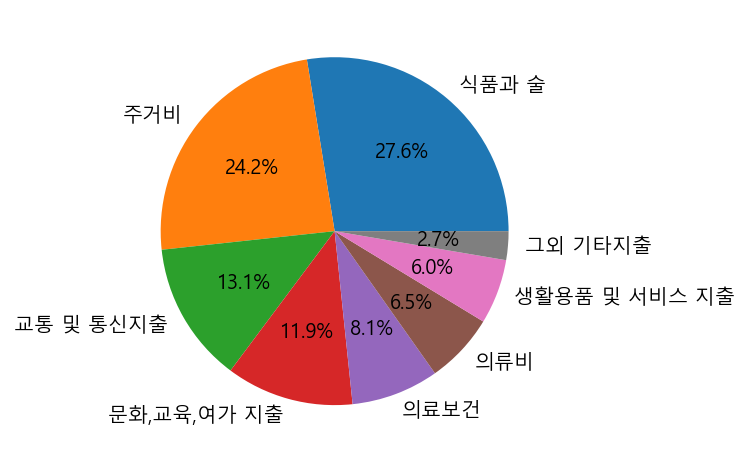

In [10]:
labels=list(data.columns)
ratio=data.values.tolist()[0]
plt.pie(ratio, labels=labels, autopct='%.1f%%')
plt.show()

# 2020년 도시인구 및 농촌사람 소득 그래프

In [11]:
all_expense_income=pd.read_excel('data/全国及分城乡居民收支基础情况.xls',header=0)
all_expense_income=all_expense_income.T.rename(columns=all_expense_income.T.iloc[0])
all_expense_income.drop(all_expense_income.index[0],inplace=True)

In [12]:
nongcun2020=all_expense_income.iloc[[0]]

In [13]:
nongcun2020=nongcun2020.loc[:,['农村居民人均可支配收入(元)','农村居民人均消费支出(元)']]
nongcun2020.index={'2020'}
nongcun2020.columns={'수입','지출'}

In [14]:
nongcun2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1 entries, 2020 to 2020
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   수입      1 non-null      object
 1   지출      1 non-null      object
dtypes: object(2)
memory usage: 24.0+ bytes


In [15]:
nongcun2020=nongcun2020.apply(pd.to_numeric)

In [16]:
nongcun2020=(nongcun2020*172.17/10000).round(1)

(array([0]), [Text(0, 0, '2020')])

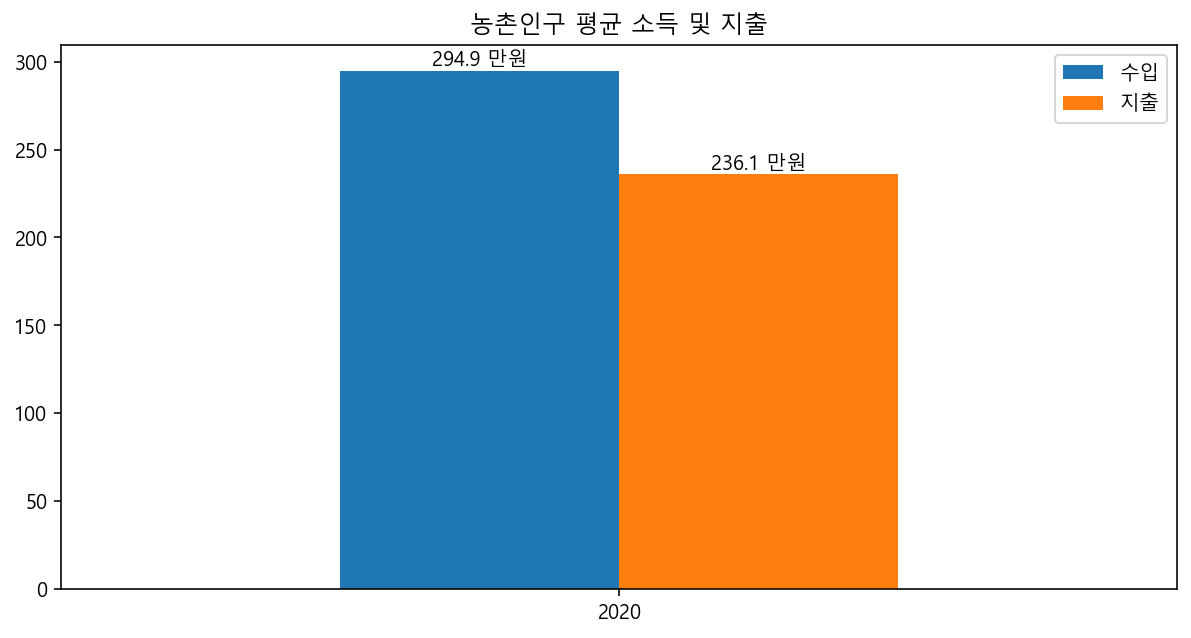

In [17]:
ax=nongcun2020.plot(kind='bar',title='농촌인구 평균 소득 및 지출',figsize=(10,5))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f 만원"%(height), (left+width/2, height*1.01), ha='center')
plt.xticks(rotation = - 0 )

In [18]:
china_2020=pd.DataFrame(china_expense_income.loc['2020年',['城镇居民人均可支配收入(元)','城镇居民人均消费支出(元)']]/10000).T
china_2020.columns=['수입','평균지출']

In [19]:
china_2020

,수입,평균지출
2020年,754.7,465.0


(array([0]), [Text(0, 0, '2020年')])

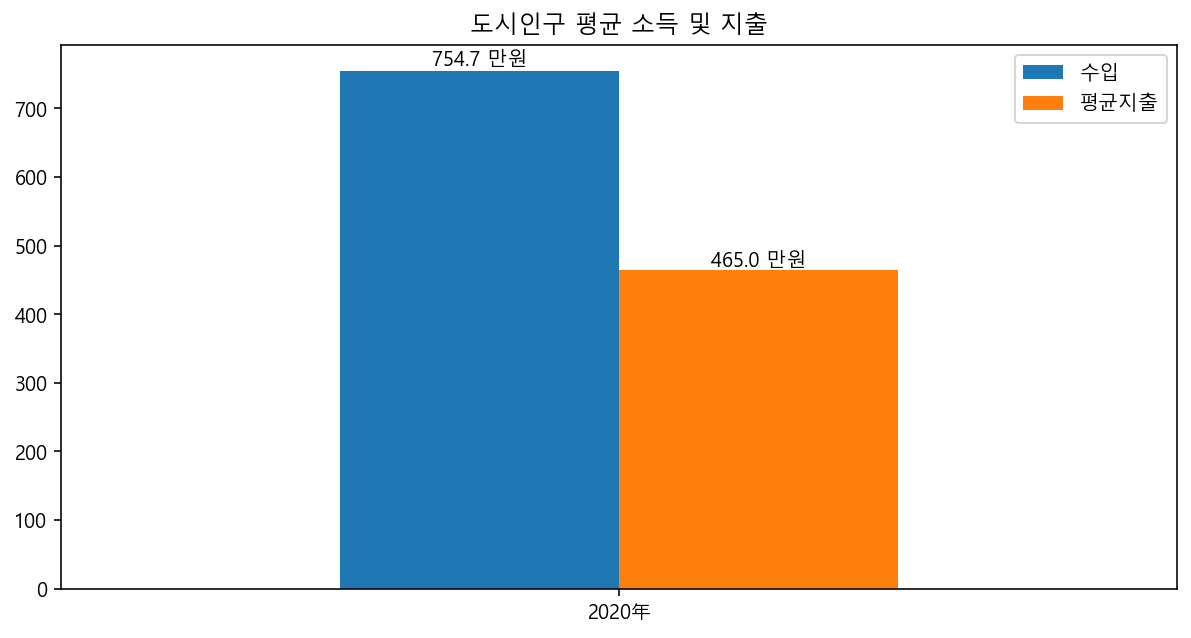

In [20]:
ax=china_2020.plot(kind='bar',title='도시인구 평균 소득 및 지출',figsize=(10,5))
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    ax.annotate("%.1f 만원"%(height), (left+width/2, height*1.01), ha='center')
plt.xticks(rotation = - 0 )